In [1]:
import sys
sys.path.append("../src")
import pandas as pd
import ann_model as ann
import numpy as np
from ase.data import atomic_numbers
from matplotlib import pyplot as plt
elements = list(atomic_numbers.keys())

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_pickle("../data/all_data.xz")

In [3]:
dfx = df.drop(columns = ['time_per_call', 'n_calls', 'normalized_time_per_call', 'convergence'] + elements).astype('float')
dfy = df['normalized_time_per_call'].astype('float')

model = ann.TimePerCall(nvars = len(dfx.columns))
ind_tr, ind_val = ann.train_test_indices(dfx)
X_tr = dfx.loc[ind_tr]
Y_tr = dfy.loc[ind_tr]
X_val = dfx.loc[ind_val]
Y_val = dfy.loc[ind_val]
model.train_normed(X_tr, Y_tr)

Epoch 1/25
906/906 [==============================] - 2s 3ms/step - loss: 0.6676 - mae: 0.6572 - val_loss: 0.4508 - val_mae: 0.4402
Epoch 2/25
906/906 [==============================] - 2s 2ms/step - loss: 0.3721 - mae: 0.3614 - val_loss: 0.2900 - val_mae: 0.2792
Epoch 3/25
906/906 [==============================] - 2s 2ms/step - loss: 0.2963 - mae: 0.2856 - val_loss: 0.2357 - val_mae: 0.2249
Epoch 4/25
906/906 [==============================] - 2s 2ms/step - loss: 0.2526 - mae: 0.2418 - val_loss: 0.1948 - val_mae: 0.1840
Epoch 5/25
906/906 [==============================] - 2s 2ms/step - loss: 0.2233 - mae: 0.2125 - val_loss: 0.1672 - val_mae: 0.1564
Epoch 6/25
906/906 [==============================] - 3s 3ms/step - loss: 0.2033 - mae: 0.1925 - val_loss: 0.1533 - val_mae: 0.1425
Epoch 7/25
906/906 [==============================] - 8s 9ms/step - loss: 0.1906 - mae: 0.1798 - val_loss: 0.1433 - val_mae: 0.1325
Epoch 8/25
906/906 [==============================] - 8s 9ms/step - loss: 0.

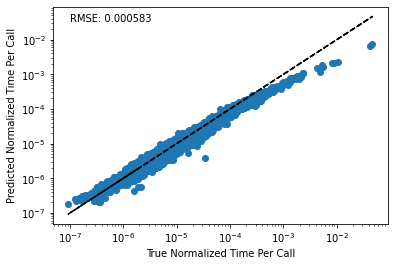

In [4]:
Y_hat = model.predict_normed(X_val)
plt.scatter(Y_val, Y_hat)
plt.plot(Y_val, Y_val, 'k--')
target = 'Normalized Time Per Call'
rmse = np.mean((Y_val.values - Y_hat[:, 0])**2)**0.5
plt.xlabel("True %s" %(target))
plt.ylabel("Predicted %s" %(target))
plt.text(1e-7, 0.7*max((Y_val)), "RMSE: %.6f" %(rmse))
plt.xscale('log')
plt.yscale('log')
plt.show()

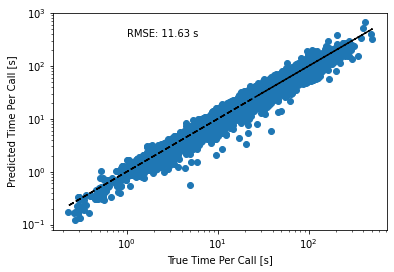

In [23]:
t_hat = Y_hat[:, 0] * X_val['n_el^3']*X_val['n_k']/X_val['n_cores']
t_val = df.loc[ind_val, 'time_per_call']
plt.scatter(t_val, t_hat)
plt.plot(t_val, t_val, 'k--')
target = 'Time Per Call [s]'
rmse = np.mean((t_val.values - t_hat)**2)**0.5
plt.xlabel("True %s" %(target))
plt.ylabel("Predicted %s" %(target))
plt.text(1e0, 0.7*max((t_val)), "RMSE: %.2f s" %(rmse))
plt.xscale('log')
plt.yscale('log')
plt.show()